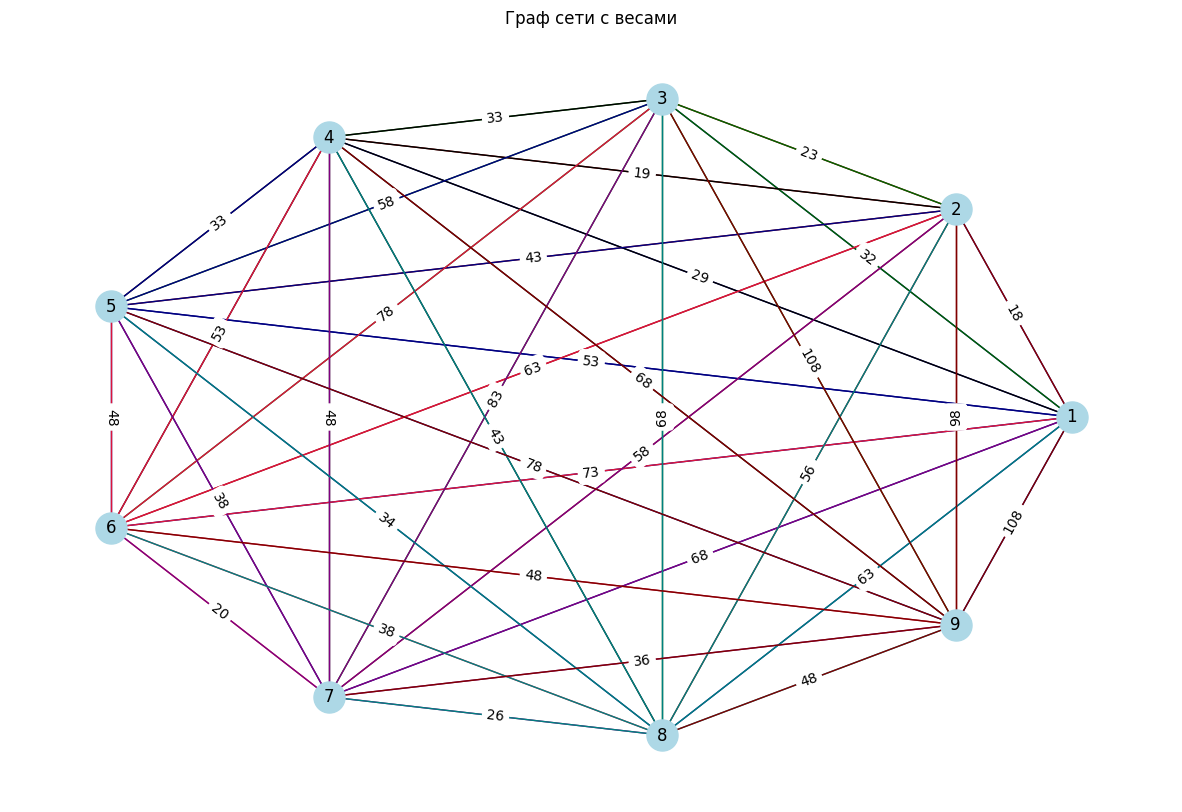

In [7]:
# Импортируем необходимые библиотеки
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Рисуем граф сети
M = [
    [0, 18, 32, 29, 53, 73, 68, 63, 108],
    [18, 0, 23, 19, 43, 63, 58, 56, 98],
    [32, 23, 0, 33, 58, 78, 83, 68, 108],
    [29, 19, 33, 0, 33, 53, 48, 43, 68],
    [53, 43, 58, 33, 0, 48, 38, 34, 78],
    [73, 63, 78, 53, 48, 0, 20, 38, 48],
    [68, 58, 83, 48, 38, 20, 0, 26, 36],
    [63, 56, 68, 43, 34, 38, 26, 0, 48],
    [108, 98, 108, 68, 78, 48, 36, 48, 0]
]
distances = np.matrix(M)

def new_graph_from_matrix(distances: np.matrix) -> nx.Graph:
    # Создаем граф из матрицы весов
    return nx.from_numpy_array(distances)


def visualize_distance_matrix(G: nx.Graph):
    # Создаем макет для графа
    pos = nx.circular_layout(G)
    
    # Рисуем граф
    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    colors = [
        "darkblue", 
        "darkred", 
        "darkgreen", 
        "black", 
        "navy", 
        "crimson", 
        "purple", 
        "teal", 
        "maroon"
    ]
    # Рисуем ребра и красим их разными цветами
    for c, i in zip(colors, range(0, 9)):
        edgelist = [(u, v) for (u, v) in G.edges() if u == i or v == i]
        nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color=c)

    # Добавляем метки вершин
    labels = {idx: idx+1 for idx in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels)
    
    # Добавляем веса ребер
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.title('Граф сети с весами')
    plt.axis('off')
    plt.show()

# Визуализируем сеть
G = new_graph_from_matrix(distances=distances)
visualize_distance_matrix(G)

In [4]:
import numpy as np
from lib import new_matrixies_from_original

# Определение группы
## Находим упорядоченную матрицу, матрицу номеров и суммарную матрицу
_M, Mk, Mc = new_matrixies_from_original(M)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M))
print(np.array(Mk))
print(np.array(Mc))

[[  0   0   0   0   0   0   0   0   0]
 [ 18  18  23  19  33  20  20  26  36]
 [ 29  19  32  29  34  38  26  34  48]
 [ 32  23  33  33  38  48  36  38  48]
 [ 53  43  58  33  43  48  38  43  68]
 [ 63  56  68  43  48  53  48  48  78]
 [ 68  58  78  48  53  63  58  56  98]
 [ 73  63  83  53  58  73  68  63 108]
 [108  98 108  68  78  78  83  68 108]]
[[1 2 3 4 5 6 7 8 9]
 [2 1 2 2 4 7 6 7 7]
 [4 4 1 1 8 8 8 5 6]
 [3 3 4 3 7 5 9 6 8]
 [5 5 5 5 2 9 5 4 4]
 [8 8 8 8 6 4 4 9 5]
 [7 7 6 7 1 2 2 2 2]
 [6 6 7 6 3 1 1 1 1]
 [9 9 9 9 9 3 3 3 3]]
[[  0   0   0   0   0   0   0   0   0]
 [ 18  18  23  19  33  20  20  26  36]
 [ 47  37  55  48  67  58  46  60  84]
 [ 79  60  88  81 105 106  82  98 132]
 [132 103 146 114 148 154 120 141 200]
 [195 159 214 157 196 207 168 189 278]
 [263 217 292 205 249 270 226 245 376]
 [336 280 375 258 307 343 294 308 484]
 [444 378 483 326 385 421 377 376 592]]


In [8]:
from lib import replace_rows_and_columns_from_matrix_by_indexes
# Обратите внимание индексы матрицы считаются от 0, а не от 1
indx_to_replace = [0, 1, 3]

M_1 = replace_rows_and_columns_from_matrix_by_indexes(M, indx_to_replace)
print(np.array(M_1))


_M_1, Mk_1, Mc_1 = new_matrixies_from_original(M_1)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk_1:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_1))
print(np.array(Mk_1))
print(np.array(Mc_1))

[[  0  58  78  83  68 108]
 [ 58   0  48  38  34  78]
 [ 78  48   0  20  38  48]
 [ 83  38  20   0  26  36]
 [ 68  34  38  26   0  48]
 [108  78  48  36  48   0]]
[[  0   0   0   0   0   0]
 [ 58  34  20  20  26  36]
 [ 68  38  38  26  34  48]
 [ 78  48  48  36  38  48]
 [ 83  58  48  38  48  78]
 [108  78  78  83  68 108]]
[[1 2 3 4 5 6]
 [2 5 4 3 4 4]
 [5 4 5 5 2 3]
 [3 3 2 6 3 5]
 [4 1 6 2 6 2]
 [6 6 1 1 1 1]]
[[  0   0   0   0   0   0]
 [ 58  34  20  20  26  36]
 [126  72  58  46  60  84]
 [204 120 106  82  98 132]
 [287 178 154 120 146 210]
 [395 256 232 203 214 318]]


In [11]:
from lib import replace_rows_and_columns_from_matrix_by_indexes
# Обратите внимание индексы матрицы считаются от 0, а не от 1
indx_to_replace = [2, 3, 4]

M_2 = replace_rows_and_columns_from_matrix_by_indexes(M_1, indx_to_replace)
print(np.array(M_2))


_M_2, Mk_2, Mc_2 = new_matrixies_from_original(M_2)

# Обновим индексы, чтобы отсчет шел от 2 
for row in Mk_2:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_2))
print(np.array(Mk_2))
print(np.array(Mc_2))

[[  0  58 108]
 [ 58   0  78]
 [108  78   0]]
[[  0   0   0]
 [ 58  58  78]
 [108  78 108]]
[[1 2 3]
 [2 1 2]
 [3 3 1]]
[[  0   0   0]
 [ 58  58  78]
 [166 136 186]]


In [ ]:
from lib import replace_rows_and_columns_from_matrix_by_indexes
# Обратите внимание индексы матрицы считаются от 0, а не от 1
indx_to_replace = [2, 3, 4]

M_3 = replace_rows_and_columns_from_matrix_by_indexes(M_1, indx_to_replace)
print(np.array(M_3))


_M_3, Mk_3, Mc_3 = new_matrixies_from_original(M_3)

# Обновим индексы, чтобы отсчет шел от 3 
for row in Mk_3:
    for j in range(len(row)):
        row[j] += 3

print(np.array(_M_3))
print(np.array(Mk_3))
print(np.array(Mc_3))

In [14]:
# Находим группу h=2
M_corrected = [
    [0, 43, 58],
    [43, 0, 38],
    [58, 38, 0],
]

_M_h2, Mk_h2, Mc_h2 = new_matrixies_from_original(M_corrected)

# Обновим индексы, чтобы отсчет шел от 1
for row in Mk_h2:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_h2))
print(np.array(Mk_h2))
print(np.array(Mc_h2))

[[ 0  0  0]
 [43 38 38]
 [58 43 58]]
[[1 2 3]
 [2 3 2]
 [3 1 1]]
[[  0   0   0]
 [ 43  38  38]
 [101  81  96]]


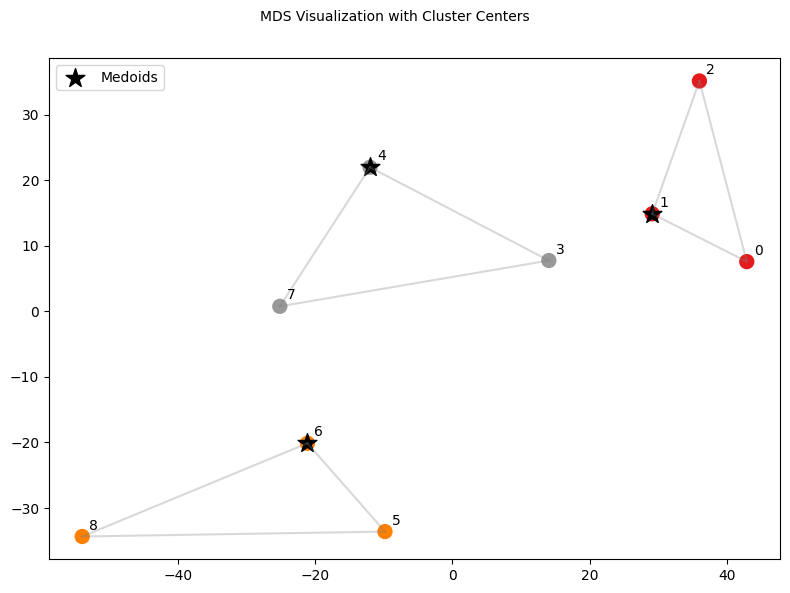


Cluster Medoids (most central points):
----------------------------------------
Cluster 1: Point 1
Average distance to cluster points: 13.67
Cluster members: [np.int64(0), np.int64(1), np.int64(2)]

Cluster 2: Point 6
Average distance to cluster points: 18.67
Cluster members: [np.int64(5), np.int64(6), np.int64(8)]

Cluster 3: Point 4
Average distance to cluster points: 22.33
Cluster members: [np.int64(3), np.int64(4), np.int64(7)]



In [9]:
# Самопроверка через MDS

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Матрица расстояний
M = [
    [0, 18, 32, 29, 53, 73, 68, 63, 108],
    [18, 0, 23, 19, 43, 63, 58, 56, 98],
    [32, 23, 0, 33, 58, 78, 83, 68, 108],
    [29, 19, 33, 0, 33, 53, 48, 43, 68],
    [53, 43, 58, 33, 0, 48, 38, 34, 78],
    [73, 63, 78, 53, 48, 0, 20, 38, 48],
    [68, 58, 83, 48, 38, 20, 0, 26, 36],
    [63, 56, 68, 43, 34, 38, 26, 0, 48],
    [108, 98, 108, 68, 78, 48, 36, 48, 0]
]
X = np.array(M)

# Cluster assignments
cluster_assignments = np.zeros(9, dtype=int)
cluster_assignments[[1, 0, 2]] = 0  # C1
cluster_assignments[[6, 5, 8]] = 1  # C2
cluster_assignments[[4, 3, 7]] = 2  # C3

def find_cluster_centers(points, cluster_labels, distance_matrix):
    medoids = {}
    
    for cluster_id in np.unique(cluster_labels):
        # Получаем точки в этом кластере
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        
        # Находим медоид (точку с минимальным средним расстоянием до других точек в кластере)
        min_avg_dist = float('inf')
        medoid_idx = None
        
        for i in cluster_indices:
            avg_dist = np.mean([distance_matrix[i][j] for j in cluster_indices])
            if avg_dist < min_avg_dist:
                min_avg_dist = avg_dist
                medoid_idx = i
                
        medoids[cluster_id] = (medoid_idx, points[medoid_idx])
    
    return medoids

plt.figure(figsize=(8, 6))
plt.suptitle('MDS Visualization with Cluster Centers\n', fontsize=10)

# MDS-преобразование
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
points_mds = mds.fit_transform(X)
medoids_mds = find_cluster_centers(points_mds, cluster_assignments, M)

# Отображаем точки с цветами кластеров
scatter = plt.scatter(points_mds[:, 0], points_mds[:, 1],
                    c=cluster_assignments, cmap='Set1', s=100)

# Добавляем названия точек
for i in range(len(points_mds)):
    plt.annotate(str(i), (points_mds[i, 0], points_mds[i, 1]),
               xytext=(5, 5), textcoords='offset points')

# Рисуем линии между точками в одном кластере
for cluster_points in [[1, 0, 2], [6, 5, 8], [4, 3, 7]]:
    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            p1, p2 = cluster_points[i], cluster_points[j]
            plt.plot([points_mds[p1, 0], points_mds[p2, 0]],
                   [points_mds[p1, 1], points_mds[p2, 1]],
                   'gray', alpha=0.3)

# Отображаем медоиды
for cluster_id, (_, medoid_point) in medoids_mds.items():
    plt.scatter(medoid_point[0], medoid_point[1], c='black', marker='*', s=200,
              label='Medoids' if cluster_id == 0 else "")

plt.legend()
plt.tight_layout()
plt.show()

# Выводим медоиды для каждого кластера
print("\nCluster Medoids (most central points):")
print("-" * 40)
for cluster_id in range(3):
    medoid_idx = medoids_mds[cluster_id][0]
    print(f"Cluster {cluster_id + 1}: Point {medoid_idx}")
    
    # Print average distance to other points in cluster
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    avg_dist = np.mean([M[medoid_idx][j] for j in cluster_indices])
    print(f"Average distance to cluster points: {avg_dist:.2f}")
    print(f"Cluster members: {list(cluster_indices)}")
    print()

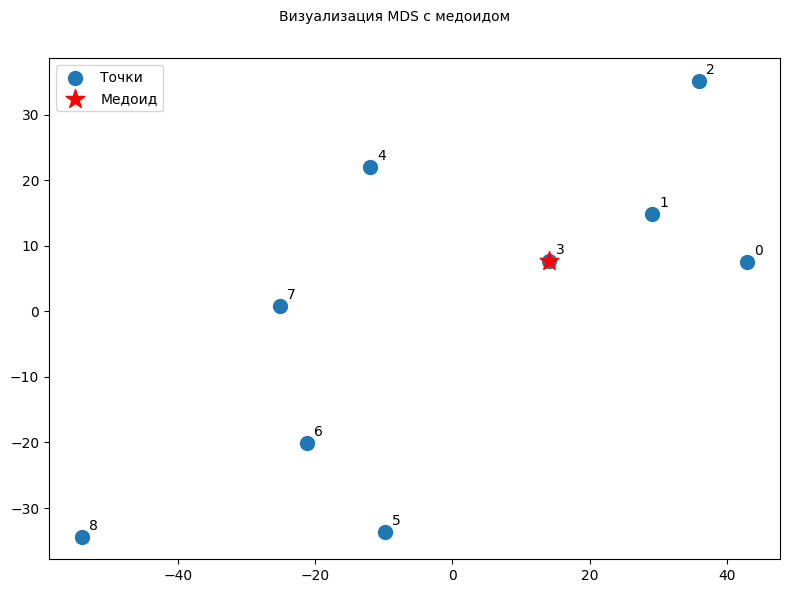


Информация о медоиде:
----------------------------------------
Медоид: Точка 3
Среднее расстояние до всех точек: 36.22


In [15]:
# Самопроверка через MDS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Матрица расстояний
M = [
    [0, 18, 32, 29, 53, 73, 68, 63, 108],
    [18, 0, 23, 19, 43, 63, 58, 56, 98],
    [32, 23, 0, 33, 58, 78, 83, 68, 108],
    [29, 19, 33, 0, 33, 53, 48, 43, 68],
    [53, 43, 58, 33, 0, 48, 38, 34, 78],
    [73, 63, 78, 53, 48, 0, 20, 38, 48],
    [68, 58, 83, 48, 38, 20, 0, 26, 36],
    [63, 56, 68, 43, 34, 38, 26, 0, 48],
    [108, 98, 108, 68, 78, 48, 36, 48, 0]
]
X = np.array(M)

def find_medoid(points, distance_matrix):
    """Находит медоид - точку с минимальным средним расстоянием до всех других точек"""
    min_avg_dist = float('inf')
    medoid_idx = None
    
    for i in range(len(points)):
        avg_dist = np.mean([distance_matrix[i][j] for j in range(len(points))])
        if avg_dist < min_avg_dist:
            min_avg_dist = avg_dist
            medoid_idx = i
            
    return medoid_idx, min_avg_dist

plt.figure(figsize=(8, 6))
plt.suptitle('Визуализация MDS с медоидом\n', fontsize=10)

# MDS преобразование
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
points_mds = mds.fit_transform(X)

# Отображаем точки
plt.scatter(points_mds[:, 0], points_mds[:, 1], s=100, label='Точки')

# Находим и отображаем медоид
medoid_idx, avg_dist = find_medoid(points_mds, M)
plt.scatter(points_mds[medoid_idx, 0], points_mds[medoid_idx, 1], 
           c='red', marker='*', s=200, label='Медоид')

# Добавляем метки точек
for i in range(len(points_mds)):
    plt.annotate(str(i), (points_mds[i, 0], points_mds[i, 1]),
               xytext=(5, 5), textcoords='offset points')

plt.legend()
plt.tight_layout()
plt.show()

# Выводим информацию о медоиде
print("\nИнформация о медоиде:")
print("-" * 40)
print(f"Медоид: Точка {medoid_idx}")
print(f"Среднее расстояние до всех точек: {avg_dist:.2f}")